In [221]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [305]:
!pip install mlxtend  

In [222]:
df_customer=pd.read_csv('Data/QVI_purchase_behaviour.csv')
df_transaction=pd.read_excel('Data/QVI_transaction_data.xlsx')

In [223]:
df_customer.drop_duplicates()
df_transaction.drop_duplicates()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8
...,...,...,...,...,...,...,...,...
264831,43533,272,272319,270088,89,Kettle Sweet Chilli And Sour Cream 175g,2,10.8
264832,43325,272,272358,270154,74,Tostitos Splash Of Lime 175g,1,4.4
264833,43410,272,272379,270187,51,Doritos Mexicana 170g,2,8.8
264834,43461,272,272379,270188,42,Doritos Corn Chip Mexican Jalapeno 150g,2,7.8


In [224]:
df_customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [225]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [226]:
df_customer.shape, df_transaction.shape

((72637, 3), (264836, 8))

In [227]:
df_transaction.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [228]:
df_transaction.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

In [229]:
len(df_transaction.PROD_NAME.unique())

114

In [230]:
df_transaction.groupby('PROD_NAME').count()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
PROD_NAME,,,,,,,
Burger Rings 220g,1564,1564,1564,1564,1564,1564,1564
CCs Nacho Cheese 175g,1498,1498,1498,1498,1498,1498,1498
CCs Original 175g,1514,1514,1514,1514,1514,1514,1514
CCs Tasty Cheese 175g,1539,1539,1539,1539,1539,1539,1539
Cheetos Chs & Bacon Balls 190g,1479,1479,1479,1479,1479,1479,1479
...,...,...,...,...,...,...,...
WW Sour Cream &OnionStacked Chips 160g,1483,1483,1483,1483,1483,1483,1483
WW Supreme Cheese Corn Chips 200g,1509,1509,1509,1509,1509,1509,1509
Woolworths Cheese Rings 190g,1516,1516,1516,1516,1516,1516,1516


<AxesSubplot:xlabel='TOT_SALES'>

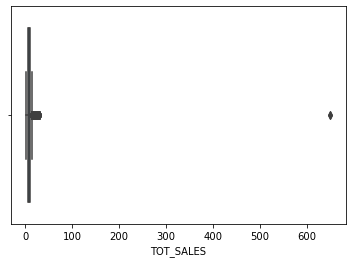

In [231]:
sns.boxplot(data=df_transaction, x=df_transaction.TOT_SALES)

<AxesSubplot:xlabel='TOT_SALES', ylabel='Count'>

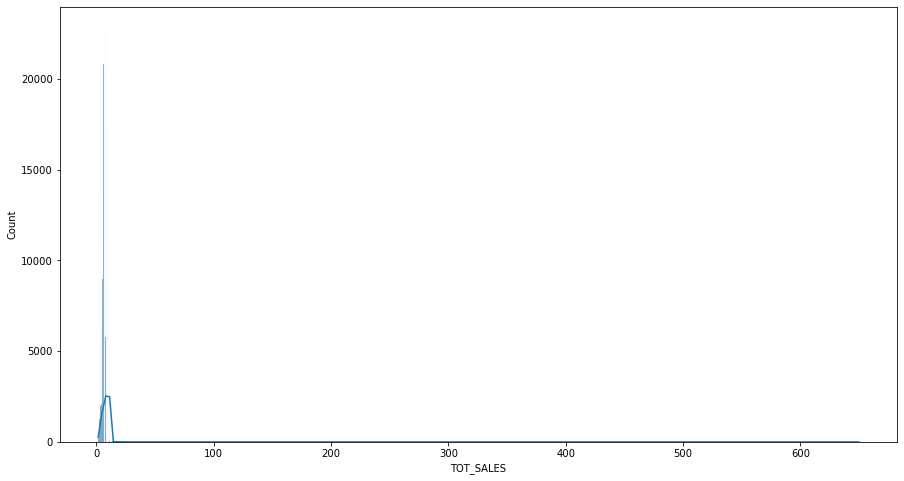

In [232]:
plt.figure(figsize=(15,8))
sns.histplot(x=df_transaction.TOT_SALES, kde=True)

In [233]:
mean_sales=df_transaction['TOT_SALES'].mean()
std_sales=df_transaction['TOT_SALES'].std()
df_transaction['TOT_SALES']= df_transaction['TOT_SALES'][(df_transaction['TOT_SALES'] > mean_sales-2*std_sales) & (df_transaction['TOT_SALES'] < mean_sales+2*std_sales)]

<AxesSubplot:xlabel='TOT_SALES'>

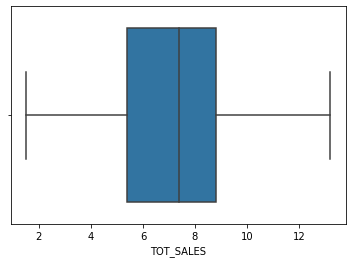

In [234]:
sns.boxplot(data=df_transaction, x=df_transaction.TOT_SALES)

<AxesSubplot:xlabel='TOT_SALES', ylabel='Count'>

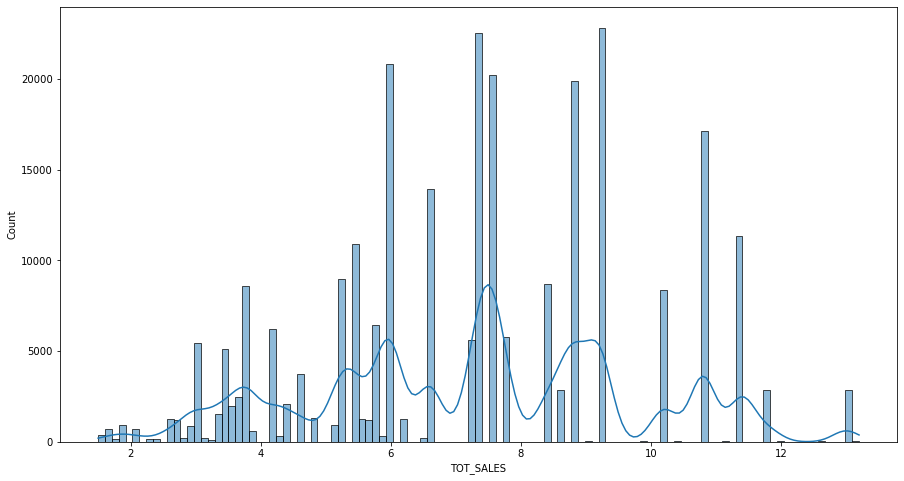

In [235]:
plt.figure(figsize=(15,8))
sns.histplot(data=df_transaction,x=df_transaction.TOT_SALES, kde=True)

In [236]:
import datetime
df_transaction["DATE"] = pd.to_datetime(df_transaction["DATE"], origin="1899-12-30",unit="D")
df_transaction['DATE'].head()
    

0   2018-10-17
1   2019-05-14
2   2019-05-20
3   2018-08-17
4   2018-08-18
Name: DATE, dtype: datetime64[ns]

In [237]:
import re
PROD_word_only = df_transaction["PROD_NAME"].str.replace('([0-9]+[gG])','').str.replace('[^\w]', ' ').str.split()

list=[]
for name in PROD_word_only:
    for word in name:
        list.append(word)

PROD_freq = pd.value_counts(list).sort_values(ascending=False)
PROD_freq

Chips       49770
Kettle      41288
Smiths      28860
Salt        27976
Cheese      27890
            ...  
Sunbites     1432
Pc           1431
NCC          1419
Garden       1419
Fries        1418
Length: 198, dtype: int64

In [238]:
df_transaction = df_transaction[~df_transaction["PROD_NAME"].str.contains("[Ss]alsa")]

In [239]:
len(df_transaction)

246742

In [240]:
trans_by_date = df_transaction.groupby(["DATE"]).count()
trans_by_date.head()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,663,663,663,663,663,663,663
2018-07-02,650,650,650,650,650,650,650
2018-07-03,674,674,674,674,674,674,674
2018-07-04,669,669,669,669,669,669,669
2018-07-05,660,660,660,660,660,660,660


In [241]:
trans_by_date.describe()

,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,677.862637,677.862637,677.862637,677.862637,677.862637,677.862637,676.024725
std,33.689358,33.689358,33.689358,33.689358,33.689358,33.689358,35.028001
min,607.000000,607.000000,607.000000,607.000000,607.000000,607.000000,581.000000
25%,658.000000,658.000000,658.000000,658.000000,658.000000,658.000000,657.000000
50%,674.000000,674.000000,674.000000,674.000000,674.000000,674.000000,672.500000
75%,694.250000,694.250000,694.250000,694.250000,694.250000,694.250000,692.000000
max,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000,865.000000


In [242]:
dates_=pd.date_range("2018-07-01", "2019-06-30")
fill_dates=trans_by_date.reindex(dates_)

In [243]:
fill_dates.index.difference(df_transaction['DATE'])
#MISSING DATE

DatetimeIndex(['2018-12-25'], dtype='datetime64[ns]', freq=None)

Text(0, 0.5, 'Transaction')

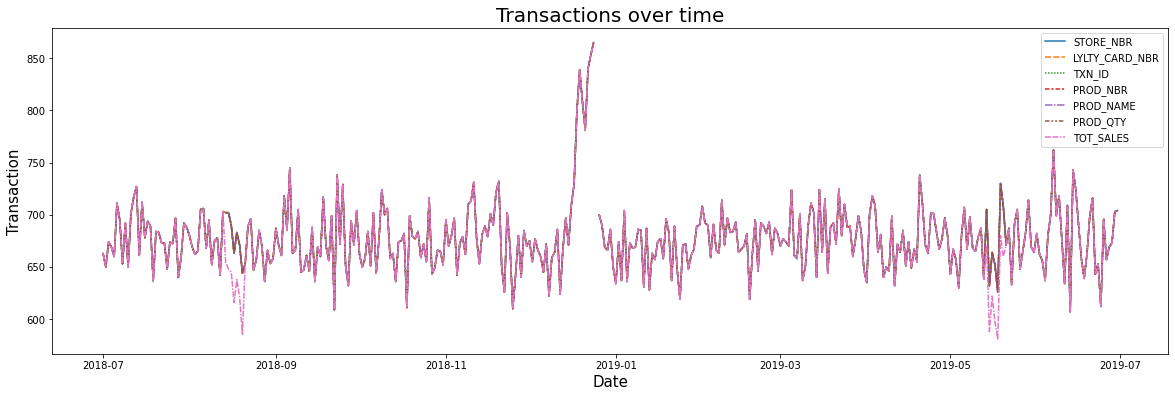

In [244]:
plt.figure(figsize=(20,6))
plt.title("Transactions over time",fontsize=20)
sns.lineplot(data=fill_dates)
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

Text(0, 0.5, 'Transaction')

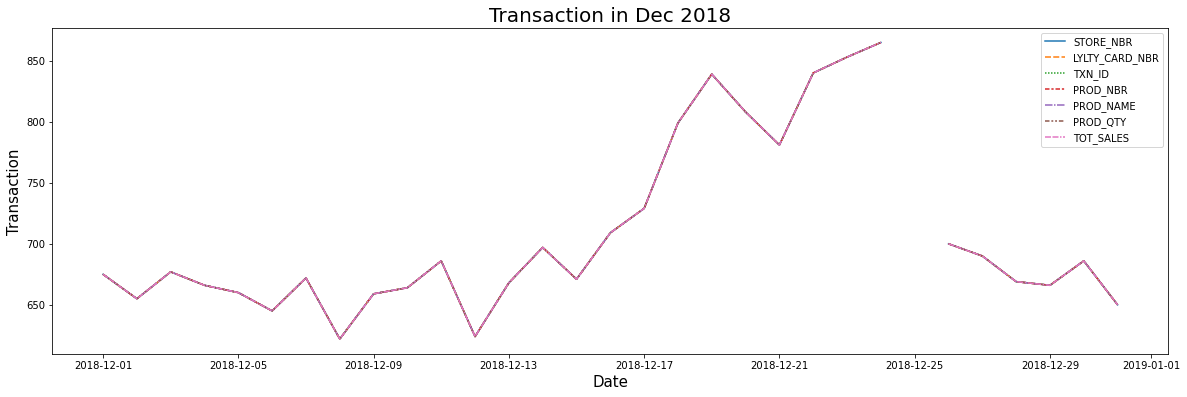

In [245]:
plt.figure(figsize=(20,6))
plt.title("Transaction in Dec 2018",fontsize=20)
sns.lineplot(data=fill_dates.loc['2018-12-01':'2018-12-31',:])
plt.xlabel("Date",fontsize=15)
plt.ylabel("Transaction",fontsize=15)

In [315]:
# checking the increasen in sales from june 2019 to july 2019
# plt.figure(figsize=(20,6))
# plt.title("Transaction in Dec 2018",fontsize=20)
# sns.lineplot(data=fill_dates.loc['2019-06-05':'2019-06-09',:])
# plt.xlabel("Date",fontsize=15)
# plt.ylabel("Transaction",fontsize=15)

In [246]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,NaN
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,NaN


In [247]:
# Pack Size
df_transaction['PACK_SIZE']=df_transaction['PROD_NAME'].str.extract("([0-9]+)").astype('float')
df_transaction['PACK_SIZE'].head()

0    175.0
1    175.0
2    170.0
3    175.0
4    150.0
Name: PACK_SIZE, dtype: float64

In [248]:
df_transaction.PACK_SIZE.describe()

count    246742.000000
mean        175.585178
std          59.434727
min          70.000000
25%         150.000000
50%         170.000000
75%         175.000000
max         380.000000
Name: PACK_SIZE, dtype: float64

In [249]:
df_transaction.PACK_SIZE.unique()

array([175., 170., 150., 330., 210., 270., 220., 125., 110., 134., 380.,
       180., 165., 135., 250., 200., 160., 190.,  90.,  70.])

<AxesSubplot:xlabel='PACK_SIZE', ylabel='Count'>

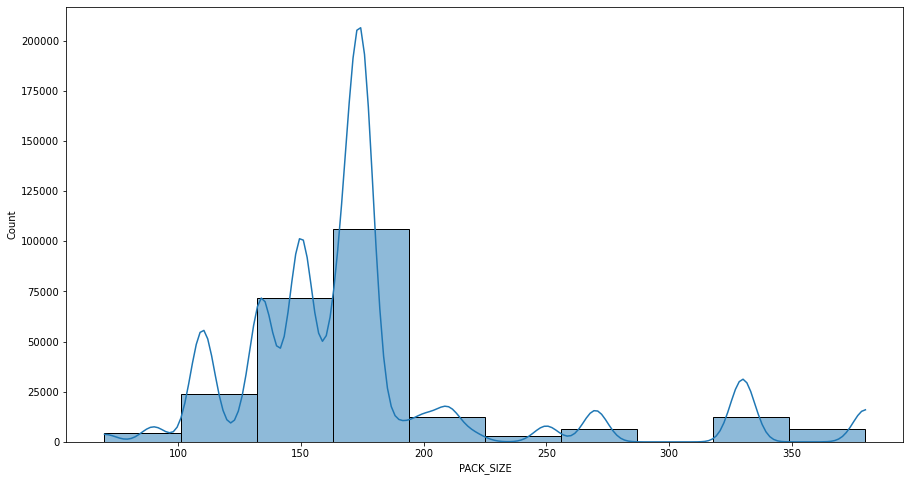

In [250]:
plt.figure(figsize=(15,8))
sns.histplot(x=df_transaction['PACK_SIZE'], bins=10, kde=True)

Pack size are mostle concentrated between 150 and 200 which looks normal

In [251]:
df_transaction['BRAND']=df_transaction['PROD_NAME'].str.split().str[0]
df_transaction['BRAND'].head()

0    Natural
1        CCs
2     Smiths
3     Smiths
4     Kettle
Name: BRAND, dtype: object

In [252]:
brand_unique=df_transaction['BRAND'].unique()
brand_unique.sort()
brand_unique

array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Dorito',
       'Doritos', 'French', 'Grain', 'GrnWves', 'Infuzions', 'Infzns',
       'Kettle', 'NCC', 'Natural', 'Pringles', 'RRD', 'Red', 'Smith',
       'Smiths', 'Snbts', 'Sunbites', 'Thins', 'Tostitos', 'Twisties',
       'Tyrrells', 'WW', 'Woolworths'], dtype=object)

In [253]:
def rename_brand (new, old):
    df_transaction['BRAND'].loc[df_transaction['BRAND']==old] = new

rename_brand("Doritos","Dorito")
rename_brand("Grain Waves","Grain")
rename_brand("Grain Waves","GrnWves")
rename_brand("Infuzions","Infzns")
rename_brand("Natural Chip Co","NCC")
rename_brand("Natural Chip Co","Natural")
rename_brand("Red Rock Deli","Red")
rename_brand("Red Rock Deli","RRD")
rename_brand("Smiths","Smith")
rename_brand("Sunbites","Snbts")
rename_brand("Woolworths","WW")

brand_unique_new=df_transaction['BRAND'].unique()
brand_unique_new.sort()
brand_unique_new


C:\Users\dwive\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


array(['Burger', 'CCs', 'Cheetos', 'Cheezels', 'Cobs', 'Doritos',
       'French', 'Grain Waves', 'Infuzions', 'Kettle', 'Natural Chip Co',
       'Pringles', 'Red Rock Deli', 'Smiths', 'Sunbites', 'Thins',
       'Tostitos', 'Twisties', 'Tyrrells', 'Woolworths'], dtype=object)

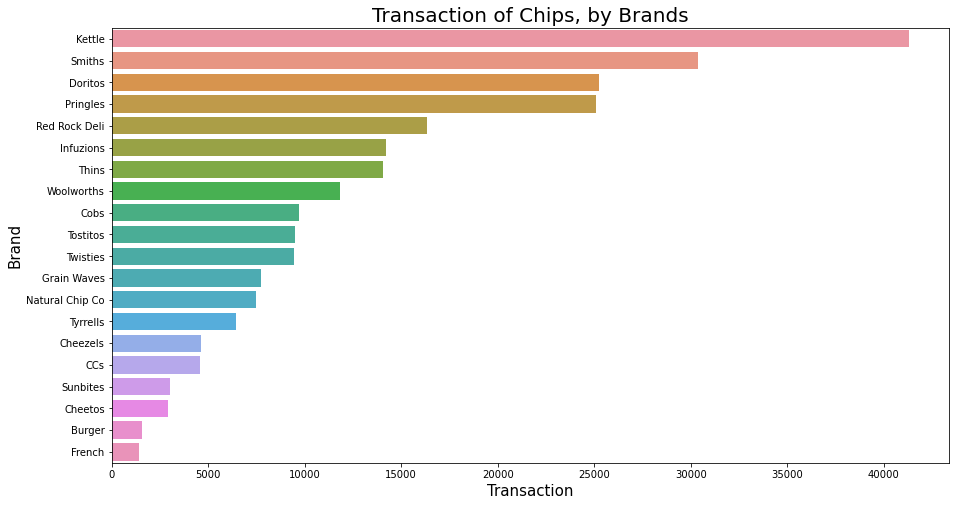

In [316]:
# Plot a barchart to show the total sales of each brand
plt.figure(figsize=(15,8))
sns.barplot(x = df_transaction["BRAND"].value_counts(),y=df_transaction["BRAND"].value_counts().index)
plt.title("Transaction of Chips, by Brands",fontsize=20)
plt.ylabel("Brand",fontsize=15)
plt.xlabel("Transaction",fontsize=15)
plt.savefig('Tansaction of chips.png')

In [255]:
df_transaction.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs
2,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths
3,2018-08-17,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,NaN,175.0,Smiths
4,2018-08-18,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,NaN,150.0,Kettle


In [256]:
df_customer.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [257]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [258]:
df_customer.describe()

,LYLTY_CARD_NBR
count,7.263700e+04
mean,1.361859e+05
std,8.989293e+04
min,1.000000e+03
25%,6.620200e+04
50%,1.340400e+05
75%,2.033750e+05
max,2.373711e+06


In [259]:
df_customer.describe(include='all')

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
count,7.263700e+04,72637,72637
unique,NaN,7,3
top,NaN,RETIREES,Mainstream
freq,NaN,14805,29245
mean,1.361859e+05,NaN,NaN
std,8.989293e+04,NaN,NaN
min,1.000000e+03,NaN,NaN
25%,6.620200e+04,NaN,NaN
50%,1.340400e+05,NaN,NaN
75%,2.033750e+05,NaN,NaN


In [265]:
np.unique(df_customer['LIFESTAGE'])

array(['MIDAGE SINGLES/COUPLES', 'NEW FAMILIES', 'OLDER FAMILIES',
       'OLDER SINGLES/COUPLES', 'RETIREES', 'YOUNG FAMILIES',
       'YOUNG SINGLES/COUPLES'], dtype=object)

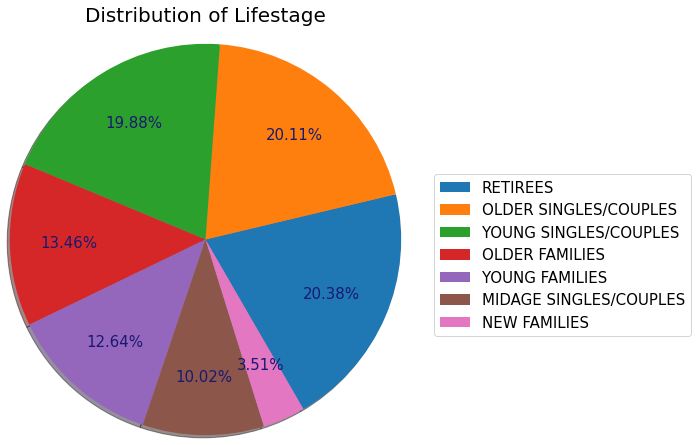

In [317]:
plt.figure(figsize=(6,6))
plt.pie(df_customer["LIFESTAGE"].value_counts(), shadow=True, textprops= {'fontsize':15,'color':'midnightblue'},radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-60)
plt.legend(df_customer["LIFESTAGE"].value_counts().index, fontsize=15,
                                                       loc=2, bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Lifestage", y=1.15, fontsize=20)
plt.savefig('Distribution of Lifestage.png')

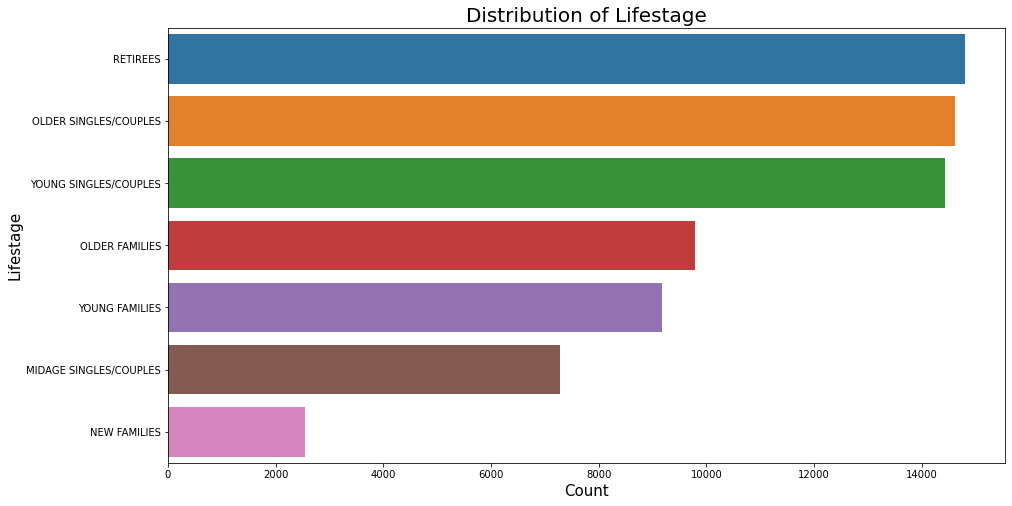

In [318]:
plt.figure(figsize=(15,8))
sns.barplot(x = df_customer["LIFESTAGE"].value_counts(),y=df_customer["LIFESTAGE"].value_counts().index)
plt.title("Distribution of Lifestage",fontsize=20)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.savefig('Distribution of Lifestage_bar.png')

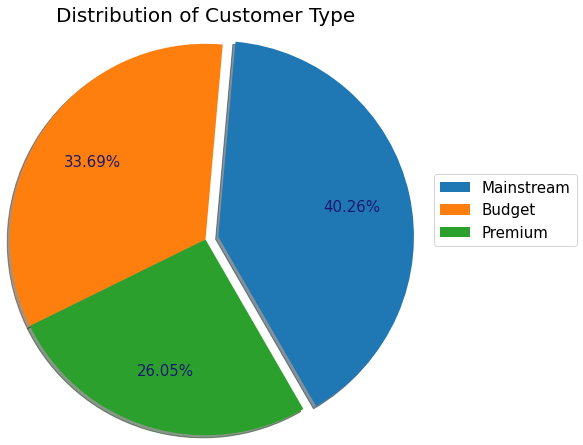

In [319]:
plt.figure(figsize=(6,6))
plt.pie(df_customer["PREMIUM_CUSTOMER"].value_counts(), shadow=True, explode=(0.1,0,0),
                                                     textprops= {'fontsize':15,'color':'midnightblue'},
                                                     radius=1.5, autopct='%.2f%%', pctdistance=0.7, startangle=-60)
plt.legend(df_customer["PREMIUM_CUSTOMER"].value_counts().index, fontsize=15,
                                                       loc=2, bbox_to_anchor=(1.2,0.7),borderaxespad = 0.)
plt.title("Distribution of Customer Type", y=1.15, fontsize=20)
plt.savefig('Distribution of Customer Type_pie.png')

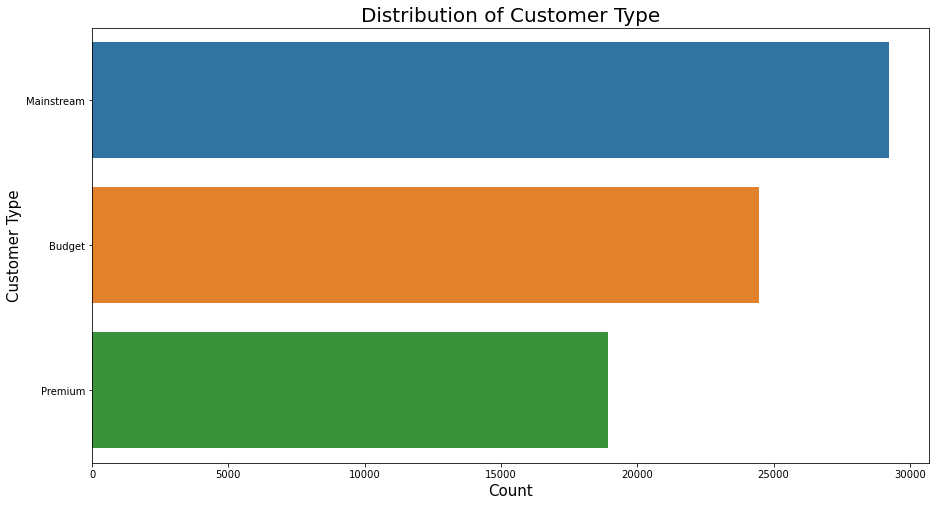

In [320]:
plt.figure(figsize=(15,8))
sns.barplot(x = df_customer["PREMIUM_CUSTOMER"].value_counts(),y=df_customer["PREMIUM_CUSTOMER"].value_counts().index)
plt.title("Distribution of Customer Type",fontsize=20)
plt.ylabel("Customer Type",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.savefig('Distribution of Customer Type_bar.png')

In [277]:
merge_data=pd.merge(df_transaction, df_customer, on='LYLTY_CARD_NBR')
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [286]:
merge_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
0,2018-10-17,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0,175.0,Natural Chip Co,YOUNG SINGLES/COUPLES,Premium
1,2019-05-14,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
2,2018-11-10,1,1307,346,96,WW Original Stacked Chips 160g,2,3.8,160.0,Woolworths,MIDAGE SINGLES/COUPLES,Budget
3,2019-03-09,1,1307,347,54,CCs Original 175g,1,2.1,175.0,CCs,MIDAGE SINGLES/COUPLES,Budget
4,2019-05-20,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9,170.0,Smiths,MIDAGE SINGLES/COUPLES,Budget


In [287]:
merge_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 246742 entries, 0 to 246741
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   DATE              246742 non-null  datetime64[ns]
 1   STORE_NBR         246742 non-null  int64         
 2   LYLTY_CARD_NBR    246742 non-null  int64         
 3   TXN_ID            246742 non-null  int64         
 4   PROD_NBR          246742 non-null  int64         
 5   PROD_NAME         246742 non-null  object        
 6   PROD_QTY          246742 non-null  int64         
 7   TOT_SALES         246073 non-null  float64       
 8   PACK_SIZE         246742 non-null  float64       
 9   BRAND             246742 non-null  object        
 10  LIFESTAGE         246742 non-null  object        
 11  PREMIUM_CUSTOMER  246742 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(5), object(4)
memory usage: 24.5+ MB


In [289]:
merge_data.describe(include='all')

<ipython-input-289-ca5314223bd1>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  merge_data.describe(include='all')


,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES,PACK_SIZE,BRAND,LIFESTAGE,PREMIUM_CUSTOMER
count,246742,246742.000000,2.467420e+05,2.467420e+05,246742.000000,246742,246742.000000,246073.000000,246742.000000,246742,246742,246742
unique,364,NaN,NaN,NaN,NaN,105,NaN,NaN,NaN,20,7,3
top,2018-12-24 00:00:00,NaN,NaN,NaN,NaN,Kettle Mozzarella Basil & Pesto 175g,NaN,NaN,NaN,Kettle,OLDER SINGLES/COUPLES,Mainstream
freq,865,NaN,NaN,NaN,NaN,3304,NaN,NaN,NaN,41288,50793,95043
first,2018-07-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2019-06-30 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,135.051098,1.355310e+05,1.351311e+05,56.351789,NaN,1.908062,7.285582,175.585178,NaN,NaN,NaN
std,NaN,76.787096,8.071528e+04,7.814772e+04,33.695428,NaN,0.659831,2.398933,59.434727,NaN,NaN,NaN
min,NaN,1.000000,1.000000e+03,1.000000e+00,1.000000,NaN,1.000000,1.700000,70.000000,NaN,NaN,NaN
25%,NaN,70.000000,7.001500e+04,6.756925e+04,26.000000,NaN,2.000000,5.800000,150.000000,NaN,NaN,NaN


In [290]:
merge_data.to_csv("merge_data.csv")

In [296]:
count_l_p = pd.DataFrame(df_customer.groupby(["LIFESTAGE","PREMIUM_CUSTOMER"], sort=True).count())
count_l_p.columns=["CUSTOMER_COUNTS"]
count_l_p

CUSTOMER_COUNTS
LIFESTAGE              PREMIUM_CUSTOMER                 
MIDAGE SINGLES/COUPLES Budget                       1504
                       Mainstream                   3340
                       Premium                      2431
NEW FAMILIES           Budget                       1112
                       Mainstream                    849
                       Premium                       588
OLDER FAMILIES         Budget                       4675
                       Mainstream                   2831
                       Premium                      2274
OLDER SINGLES/COUPLES  Budget                       4929
                       Mainstream                   4930
                       Premium                      4750
RETIREES               Budget                       4454
                       Mainstream                   6479
                       Premium                      3872
YOUNG FAMILIES         Budget                       4017
                       Mainstream                   2728
                       Premium                      2433
YOUNG SINGLES/COUPLES  Budget                       3779
                       Mainstream                   8088
                       Premium                      2574

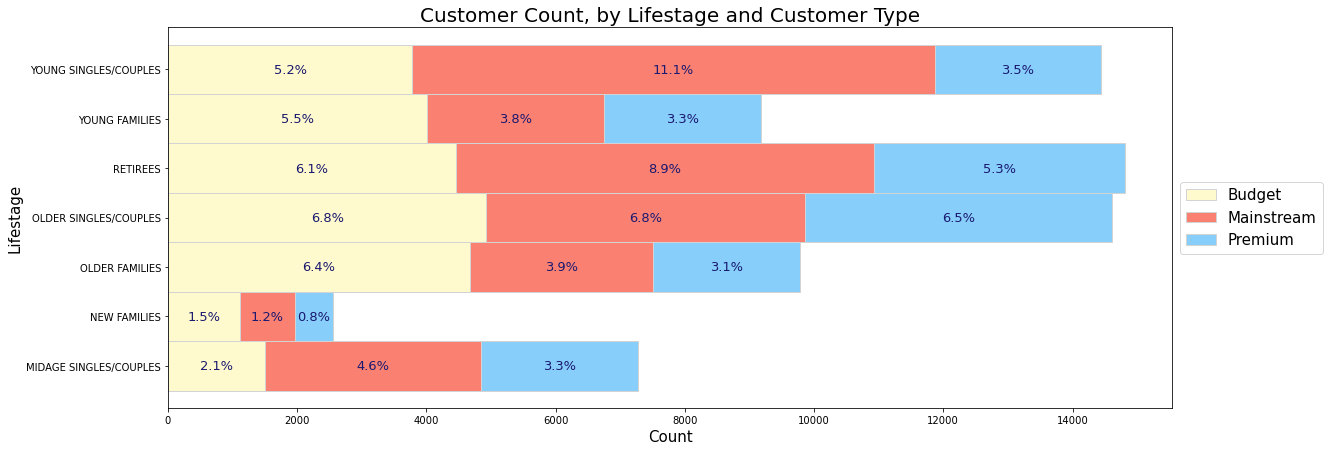

<Figure size 432x288 with 0 Axes>

In [323]:

# Plot to show total sales in each customer segement
# from https://github.com/kevwij/insidesherpa_quantium_virtual-experience/blob/master/Quantium%20-%20Module%201.ipynb
# Values of each group
bars1 = count_l_p[count_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Budget"]["CUSTOMER_COUNTS"]
bars2 = count_l_p[count_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Mainstream"]["CUSTOMER_COUNTS"]
bars3 = count_l_p[count_l_p.index.get_level_values("PREMIUM_CUSTOMER") == "Premium"]["CUSTOMER_COUNTS"]
 
bars1_text = (bars1 / sum(count_l_p["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
bars2_text = (bars2 / sum(count_l_p["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
bars3_text = (bars3 / sum(count_l_p["CUSTOMER_COUNTS"])).apply("{:.1%}".format)
 
# Names of group and bar width
names = count_l_p.index.get_level_values("LIFESTAGE").unique()

# The position of the bars on the x-axis
r = np.arange(len(names))

plt.figure(figsize=(18,7)) 

colors = ['salmon', 'lemonchiffon', 'lightskyblue']
# Create yellow bars
budget_bar = plt.barh(r, bars1, color=colors[1], edgecolor="lightgrey", height=1, label="Budget")
# Create red bars (middle)
mains_bar = plt.barh(r, bars2, left=bars1, color=colors[0], edgecolor="lightgrey", height=1, label="Mainstream")
# Create blue bars (top)
prem_bar = plt.barh(r, bars3, left=bars1.append(bars2).groupby(["LIFESTAGE"]).sum(), color=colors[2], edgecolor="lightgrey", height=1, label="Premium")
    
for i in range(7):
    budget_width = budget_bar[i].get_width()
    budget_main_width = budget_width + mains_bar[i].get_width()
    plt.text(budget_width/2, i, bars1_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_width + mains_bar[i].get_width()/2, i, bars2_text[i], va='center', ha='center', size=13, color='midnightblue')
    plt.text(budget_main_width + prem_bar[i].get_width()/2, i, bars3_text[i], va='center', ha='center', size=13, color='midnightblue')
    
# Custom X axis
plt.yticks(r, names)
plt.ylabel("Lifestage",fontsize=15)
plt.xlabel("Count",fontsize=15)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5),fontsize=15)

plt.title("Customer Count, by Lifestage and Customer Type",fontsize=20)

# Show graphic
plt.show()
plt.savefig('Customer Count by Lifestage and Customer Type.png')

In [299]:
# Brands and package sizes of 'Mainstream - young singles/couples' Segment and other segments
s = pd.DataFrame(merge_data.loc[:,["LYLTY_CARD_NBR","LIFESTAGE","PREMIUM_CUSTOMER","BRAND","PACK_SIZE","PROD_QTY"]])
m_ysc = s[(s["LIFESTAGE"]=="YOUNG SINGLES/COUPLES")&(s["PREMIUM_CUSTOMER"]=="Mainstream")]
m_ysc.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER,BRAND,PACK_SIZE,PROD_QTY
221347,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,150.0,1
221348,1020,YOUNG SINGLES/COUPLES,Mainstream,Smiths,330.0,1
221349,1020,YOUNG SINGLES/COUPLES,Mainstream,Grain Waves,180.0,1
221350,1163,YOUNG SINGLES/COUPLES,Mainstream,Kettle,175.0,1
221351,1163,YOUNG SINGLES/COUPLES,Mainstream,Natural Chip Co,175.0,1


In [300]:
m_ysc["BRAND"].value_counts().head(3)

Kettle      3844
Doritos     2379
Pringles    2315
Name: BRAND, dtype: int64

In [301]:
m_ysc["PACK_SIZE"].value_counts().head(3)

175.0    4997
150.0    3080
134.0    2315
Name: PACK_SIZE, dtype: int64

In [302]:
# Apriori analysis on brands
# Calculate sales quantity per brand per custermor in target segment
brand_s = m_ysc.groupby(["LYLTY_CARD_NBR","BRAND"])["PROD_QTY"].sum().unstack()
# Turn the shopping quantity into a 0/1 variable, i.e., whether to buy the item
basket_b = brand_s.applymap(lambda x : 1 if x>0 else 0)
basket_b

BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,Natural Chip Co,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1010,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [303]:
brand_s = m_ysc.groupby(["LYLTY_CARD_NBR","BRAND"])["PROD_QTY"].sum().unstack()
# Turn the shopping quantity into a 0/1 variable, i.e., whether to buy the item
basket_b = brand_s.applymap(lambda x : 1 if x>0 else 0)
basket_b

BRAND,Burger,CCs,Cheetos,Cheezels,Cobs,Doritos,French,Grain Waves,Infuzions,Kettle,Natural Chip Co,Pringles,Red Rock Deli,Smiths,Sunbites,Thins,Tostitos,Twisties,Tyrrells,Woolworths
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
1010,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1018,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0
1060,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0


In [306]:
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Frequent itemsets of our target segment
frequent_itemsets = apriori(basket_b, min_support=0.04, use_colnames=True)
frequent_itemsets.sort_values(by="support",ascending=False)

,support,itemsets
5,0.387142,(Kettle)
2,0.260326,(Doritos)
7,0.256158,(Pringles)
9,0.202476,(Smiths)
4,0.143110,(Infuzions)
10,0.136036,(Thins)
12,0.107364,(Twisties)
11,0.105848,(Tostitos)
1,0.103827,(Cobs)
8,0.093975,(Red Rock Deli)


In [307]:
association_rules(frequent_itemsets, metric="lift", min_threshold=1).sort_values(by=["lift","confidence","support"],ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(Infuzions),(Pringles),0.143110,0.256158,0.041051,0.286849,1.119815,0.004392,1.043036
1,(Pringles),(Infuzions),0.256158,0.143110,0.041051,0.160256,1.119815,0.004392,1.020419


In [308]:

# Apriori analysis on package size
# Calculate sales quantity per package size per custermor in target segment
brand_s = m_ysc.groupby(["LYLTY_CARD_NBR","PACK_SIZE"])["PROD_QTY"].sum().unstack()
# Turn the shopping quantity into a 0/1 variable, i.e., whether to buy the item
basket_ps = brand_s.applymap(lambda x : 1 if x>0 else 0)
basket_ps

PACK_SIZE,70.0,90.0,110.0,125.0,134.0,135.0,150.0,160.0,165.0,170.0,175.0,180.0,190.0,200.0,210.0,220.0,250.0,270.0,330.0,380.0
LYLTY_CARD_NBR,,,,,,,,,,,,,,,,,,,,
1002,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1010,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1018,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0
1020,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0
1060,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
272391,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2330041,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2330321,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [309]:

# Frequent itemsets of our target segment
frequent_itemsets_ps = apriori(basket_ps, min_support=0.06, use_colnames=True)
frequent_itemsets_ps.sort_values(by="support",ascending=False)

,support,itemsets
5,0.458254,(175.0)
2,0.313755,(150.0)
1,0.256158,(134.0)
0,0.224454,(110.0)
4,0.176835,(170.0)
8,0.139320,(330.0)
14,0.137931,"(150.0, 175.0)"
3,0.127700,(165.0)
13,0.111153,"(134.0, 175.0)"
11,0.094480,"(110.0, 175.0)"


In [310]:
# Output of apriori analysis
association_rules(frequent_itemsets_ps, metric="lift", min_threshold=1)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(165.0),(175.0),0.127700,0.458254,0.060124,0.470821,1.027423,0.001605,1.023747
1,(175.0),(165.0),0.458254,0.127700,0.060124,0.131202,1.027423,0.001605,1.004031
